<h1> House sales prediction </h1><br>
Prediction using Decision Tree, XgBoost, Random Forest and Linear Regression

#### Dataset : https://www.kaggle.com/harlfoxem/housesalesprediction <br><br>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('data.csv')

In [55]:
print(data.shape)

(21613, 21)


In [56]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Category values count

In [57]:
names = ['view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']
for row in names:
    print("------ "+row+ "-----")
    print (data[row].value_counts())
    print("\n")

------ view-----
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64


------ condition-----
3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64


------ grade-----
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


------ yr_built-----
2014    559
2006    454
2005    450
2004    433
2003    422
2007    417
1977    417
1978    387
1968    381
2008    367
1967    350
1979    343
1959    334
1990    320
1962    312
2001    305
1954    305
1987    294
1989    290
1969    280
1955    271
1988    270
1999    265
1947    263
1963    256
1976    253
1966    250
1950    250
1994    249
1960    248
       ... 
1909     94
1906     92
1930     90
1919     88
1900     87
1908     86
1923     84
1912     79
1916     79
1921     76
1905     74
1911     73
1937     68
1907     65
1915     64
1931     61
1913     59
1917     56
1914 

#### Creating dummies

In [58]:
from sklearn import preprocessing
view = pd.get_dummies(data.loc[:,"view"], prefix="view")
condition = pd.get_dummies(data.loc[:,"condition"], prefix="condition")
view.head()

,view_0,view_1,view_2,view_3,view_4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [59]:
data = pd.concat([data, condition, view], axis = 1)
data = data.drop(["view", "condition"], axis=1)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,condition_1,condition_2,condition_3,condition_4,condition_5,view_0,view_1,view_2,view_3,view_4
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,7,...,0,0,1,0,0,1,0,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,7,...,0,0,1,0,0,1,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,6,...,0,0,1,0,0,1,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,7,...,0,0,0,0,1,1,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,8,...,0,0,1,0,0,1,0,0,0,0


## Looking for NA's

In [60]:
print(data.isnull().any().sum(), ' / ', len(data.columns))

print(data.isnull().any(axis=1).sum(), ' / ', len(data))

0  /  29
0  /  21613


In [61]:
data.columns.difference(['date', 'zipcode', 'lat', 'long'])

Index(['bathrooms', 'bedrooms', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'floors', 'grade', 'id', 'price',
       'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15',
       'sqft_lot', 'sqft_lot15', 'view_0', 'view_1', 'view_2', 'view_3',
       'view_4', 'waterfront', 'yr_built', 'yr_renovated'],
      dtype='object')

In [62]:
pd.isnull(data).sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
condition_1      0
condition_2      0
condition_3      0
condition_4      0
condition_5      0
view_0           0
view_1           0
view_2           0
view_3           0
view_4           0
dtype: int64

## Data visualization
Bivariate analysis

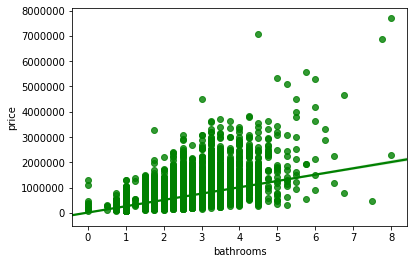

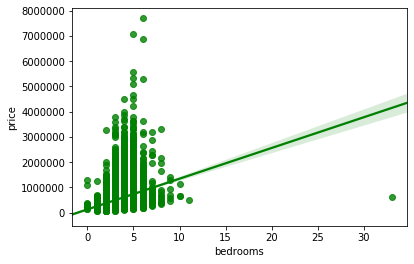

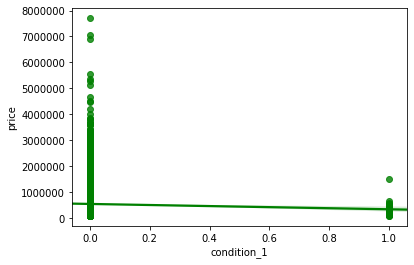

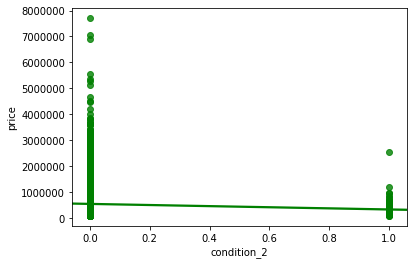

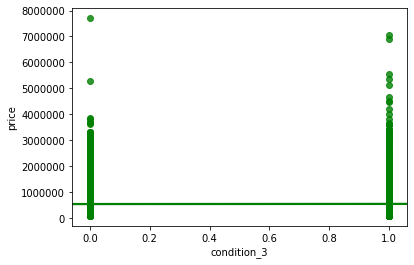

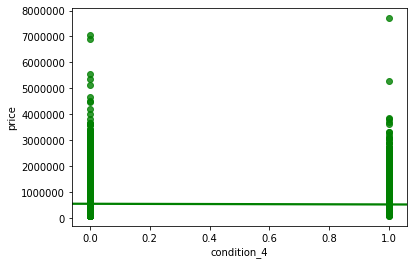

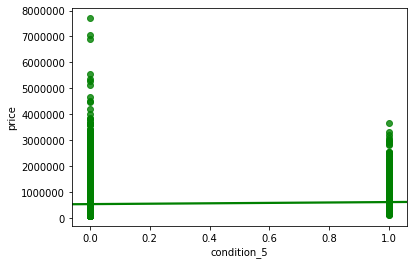

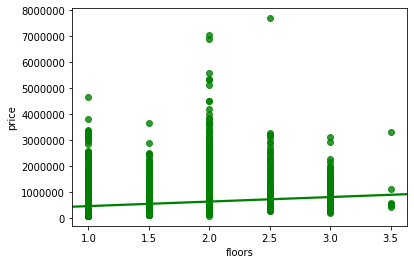

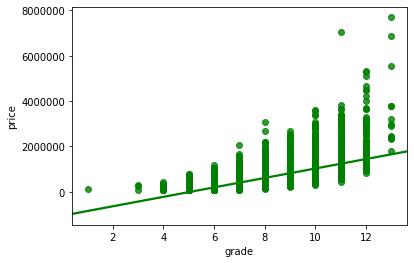

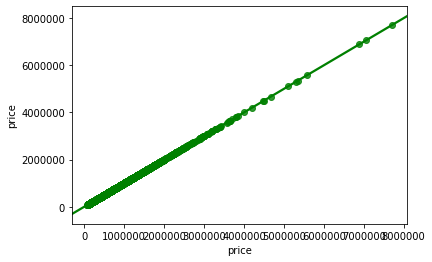

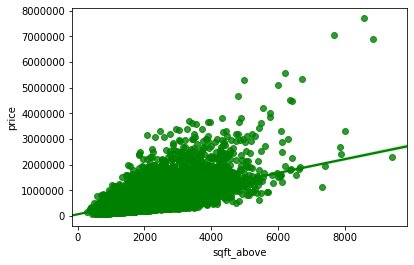

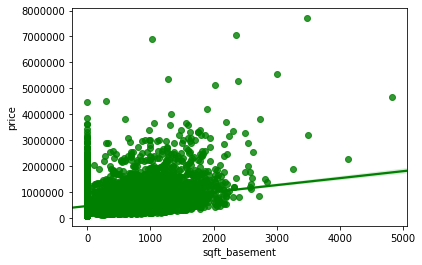

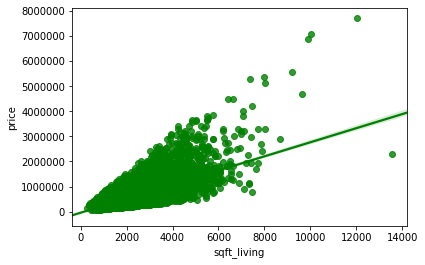

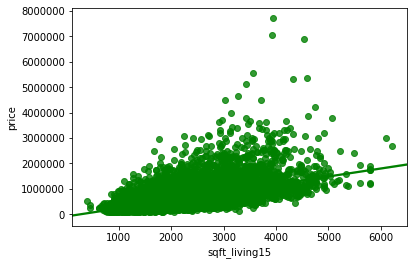

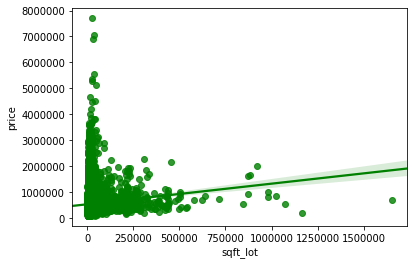

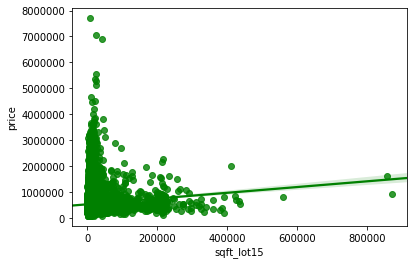

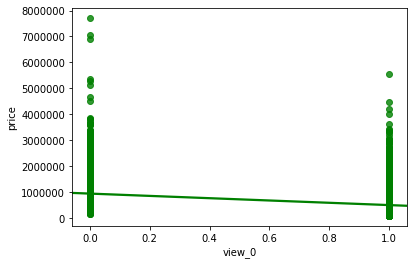

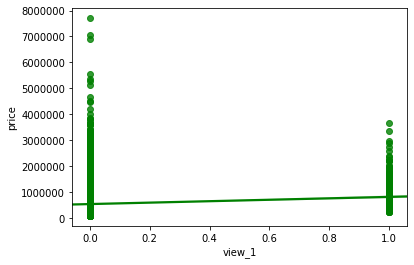

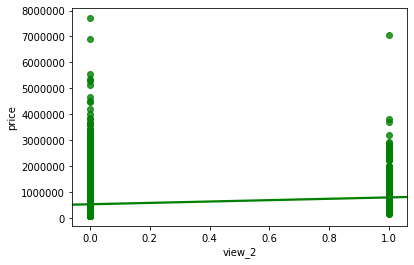

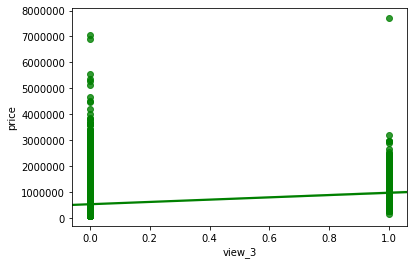

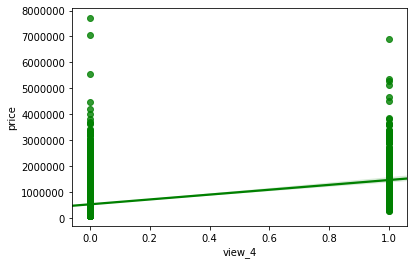

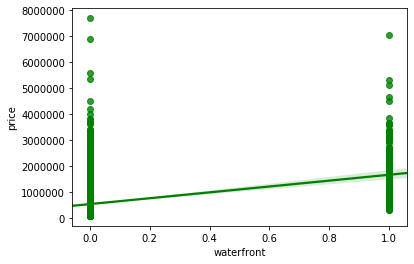

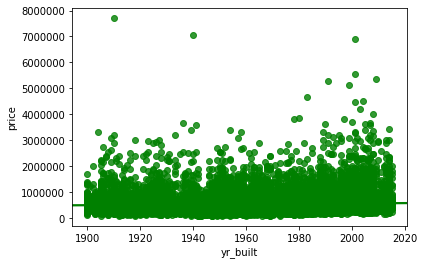

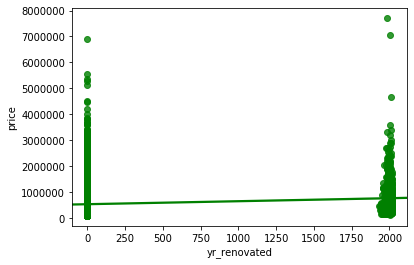

In [64]:
for i, yvar in enumerate(data.columns.difference(['date', 'zipcode', 'lat', 'long', "id"])):
    sns.regplot(x=data[yvar],y=data["price"], color='g')
    plt.show()

## Corr matrix

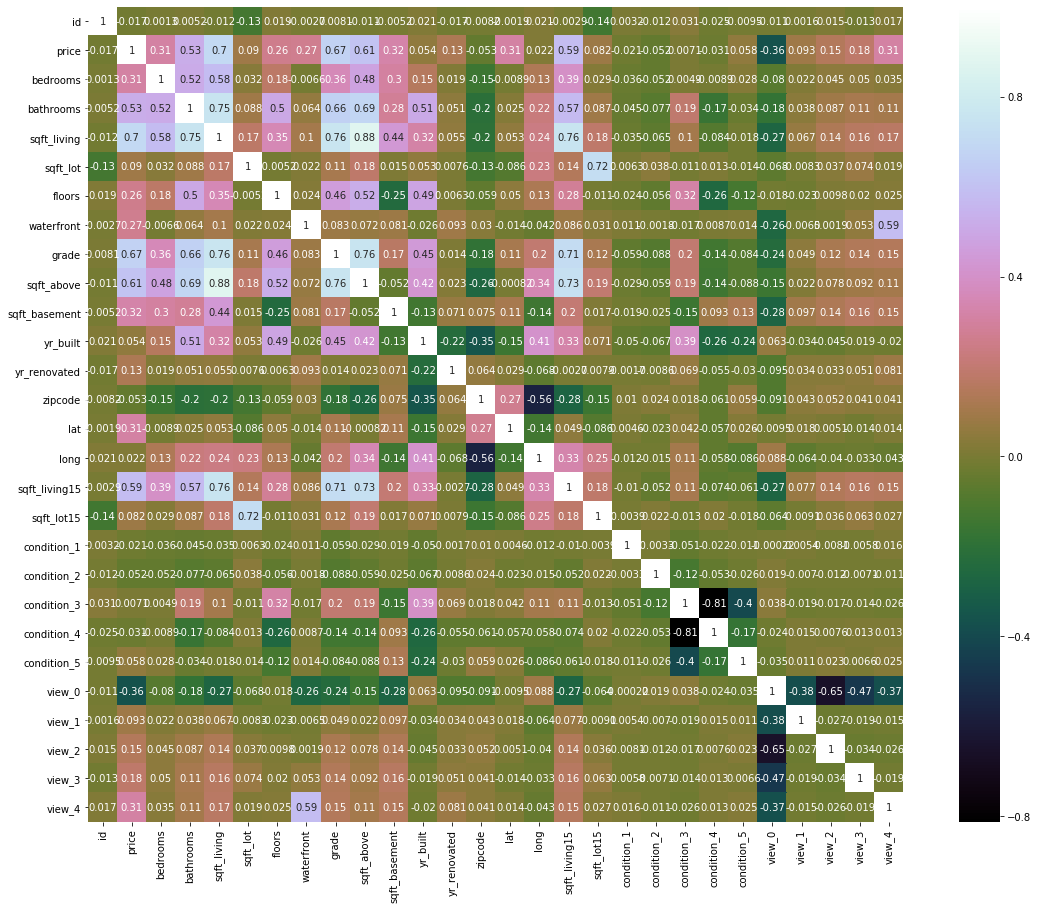

In [65]:
plt.subplots(figsize=(20, 15))
sns.heatmap(data.corr(), square=True,  linecolor='g', annot=True, cmap='cubehelix')

## Linear Regression

In [66]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = data[data.columns.difference(['date',  'price', 'yr_built', 'yr_renovated', 'id', 'zipcode'])]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1739.
Date:                Sun, 16 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:01:16   Log-Likelihood:            -2.2087e+05
No. Observations:               16209   AIC:                         4.418e+05
Df Residuals:                   16188   BIC:                         4.419e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms      4595.0595   3546.706      1.296

In [67]:
y_hat = results.predict(X_test)  
from sklearn.metrics import r2_score
r2_score(y_hat, y_test)   

0.4243192099550529

## Train, test split
default split is 75% - 25%

In [68]:
from sklearn.model_selection import train_test_split
X = data[data.columns.difference(['date', 'price', 'yr_built', 'yr_renovated', 'id'])]
y =data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


## Linear regression

In [69]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
y_hat = lm.predict(X)  
lm.score(X, y)

0.6794868211971272

$ R^2 $ is 67%

## Improvement of the model : `outliers, relationships between variables, etc.`

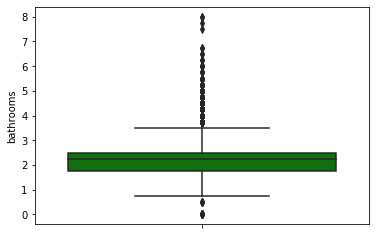

In [71]:
sns.boxplot(y=data.bathrooms, color='g')

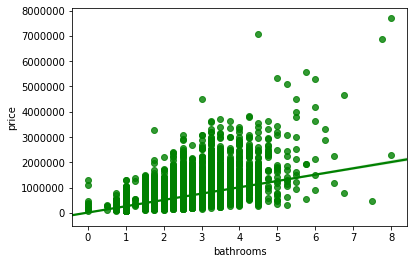

In [72]:
sns.regplot(x=data['bathrooms'],y=data["price"], color='g')


In [73]:
data.bathrooms.describe()

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [74]:
data[(data.bathrooms>6) & (data.price < 3000000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,condition_1,condition_2,condition_3,condition_4,condition_5,view_0,view_1,view_2,view_3,view_4
4024,9175600025,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,11,...,0,0,1,0,0,0,0,1,0,0
8546,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,7,...,0,0,1,0,0,1,0,0,0,0
12777,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,12,...,0,0,1,0,0,0,0,0,0,1
14556,2303900035,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,13,...,0,0,1,0,0,0,0,0,0,1
20578,424069279,20150328T000000,1180000.0,6,6.50,6260,10955,2.0,0,11,...,0,0,1,0,0,1,0,0,0,0
21506,2524069097,20140509T000000,2238890.0,5,6.50,7270,130017,2.0,0,12,...,0,0,1,0,0,1,0,0,0,0


From the scatter plot we note that there is 1 outlier point that is influencing the regression line, it represents the house that was sold with 8 bathrooms at a price of $2,280,000, we will remove it from our dataset and see how to change the graph

In [75]:
#data = data.drop(12777)
data2 = data.drop(data[(data.bathrooms==0) & (data.price < 3000000)].index)

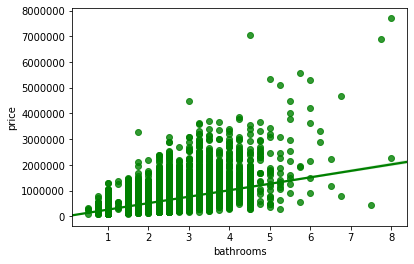

In [76]:
sns.regplot(x=data2['bathrooms'],y=data2["price"], color='g')

Outliers for the variable `sqft_above`

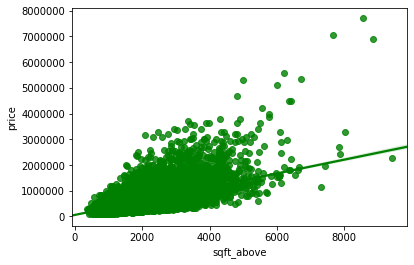

In [77]:
sns.regplot(x=data2['sqft_above'],y=data2["price"], color='g')

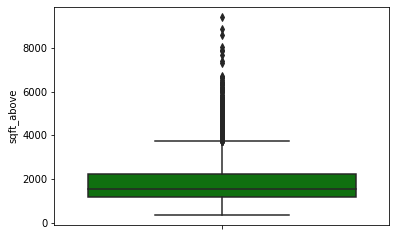

In [78]:
sns.boxplot(y=data2['sqft_above'], color='g')

In [79]:
X = data2[data.columns.difference(['date',   'price', 'yr_built', 'yr_renovated', 'id'])]
X.shape
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scores = cross_val_score(lm, X_train, y_train, cv = 5)   
print (scores, np.mean(scores), np.std(scores))

[0.68500527 0.67878058 0.65835762 0.66318038 0.66911453] 0.6708876759573732 0.009809720421214335


In [80]:
lm.fit(X_train, y_train)

y_hat = lm.predict(X_test)  

lm.score(X_test, y_test)     

0.6924094762694717

The model is still not much better than the original data

## Let's apply some transformations to our variables in order to seek to improve the model

Variables distributions:    

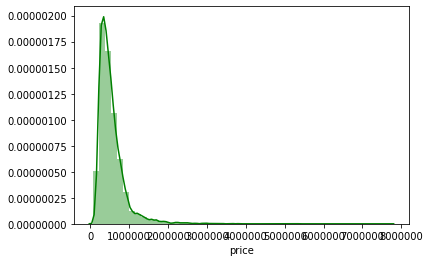

In [81]:
sns.distplot(data2['price'], color='g')

We observe that the distribution presents a certain inclination to the left, which may indicate that we should make a logarithmic transformation, to bring them closer to a normal distribution

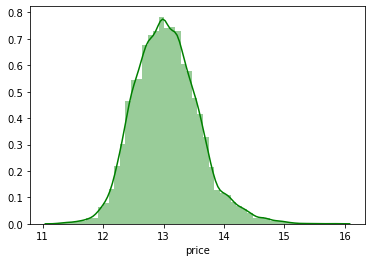

In [82]:
sns.distplot(np.log(data2['price']), color='g')

This indicates that we must make a logarithmic transformation of the variable to be predicted

In [83]:
data2.price = np.log(data2.price)

In [84]:
data2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,condition_1,condition_2,condition_3,condition_4,condition_5,view_0,view_1,view_2,view_3,view_4
0,7129300520,20141013T000000,12.309982,3,1.00,1180,5650,1.0,0,7,...,0,0,1,0,0,1,0,0,0,0
1,6414100192,20141209T000000,13.195614,3,2.25,2570,7242,2.0,0,7,...,0,0,1,0,0,1,0,0,0,0
2,5631500400,20150225T000000,12.100712,2,1.00,770,10000,1.0,0,6,...,0,0,1,0,0,1,0,0,0,0
3,2487200875,20141209T000000,13.311329,4,3.00,1960,5000,1.0,0,7,...,0,0,0,0,1,1,0,0,0,0
4,1954400510,20150218T000000,13.142166,3,2.00,1680,8080,1.0,0,8,...,0,0,1,0,0,1,0,0,0,0


Retrying linear regression

In [85]:
X = data2[data.columns.difference(['date',  'price', 'yr_built', 'yr_renovated', 'id'])]
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm.fit(X_train, y_train)
lm.score(X_test, y_test)   

0.7521649377068039

Our linear model still improves significantly to a $ R^2 $ of 74% , we continue to make transformations:

In [88]:
X = data2[data.columns.difference(['date',  'price', 'yr_built', 'yr_renovated', 'id'])]
y =data2['price']
lm = LinearRegression(normalize=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm.fit(X_train, y_train)
lm.score(X_test, y_test) 

0.752061290075675

When normalizing the data there seems to be no variation in the performance of the model. <br>
Let's see if there's any other variables that is susceptible to log transformation

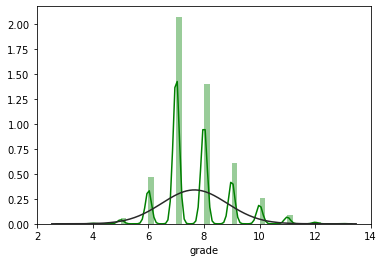

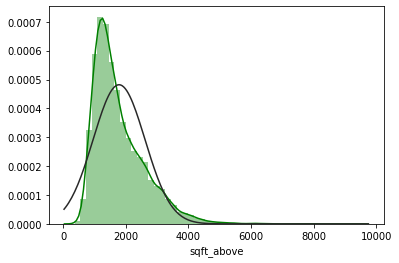

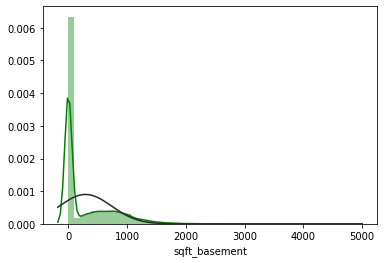

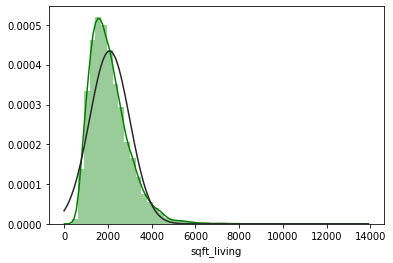

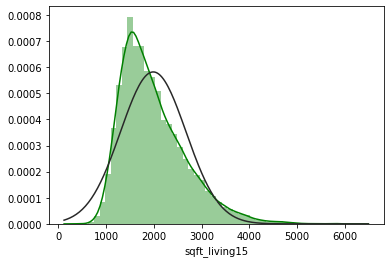

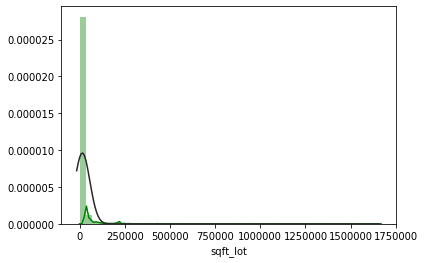

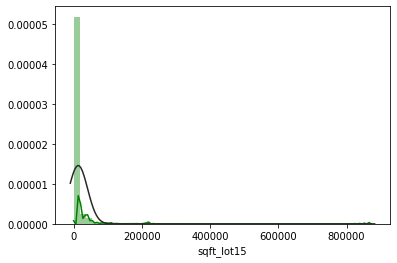

In [89]:
from scipy import stats
for i, yvar in enumerate(data2.columns.difference(['id', 'date', 'price', 'bedrooms', 'bathrooms', 
        'floors', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
        'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'view_0', 'view_1', 'view_2', 'view_3',
       'view_4', 'grade_1', 'grade_3', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13'])):
    sns.distplot((data2[yvar]),fit=stats.norm,color='g')
    plt.show()

Convertimos a las siguiente variables, sqft_lot15, sqft_lot, sqft_living15, sqft_living, sqft_above

In [90]:
#data.sqft_above[data[data.sqft_above > 0].index] = np.log(data.sqft_above[data[data.sqft_above > 0].index])
data2.sqft_above = np.log(data2.sqft_above)


C:\Users\Asch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
data2.sqft_living = np.log(data2.sqft_living)

In [92]:
data.sqft_living15 = np.log(data.sqft_living15)

In [93]:
data.sqft_lot = np.log(data.sqft_lot)

In [94]:
data.sqft_lot15 = np.log(data.sqft_lot15)

In [95]:
X = data2[data2.columns.difference(['date',  'price', 'yr_built', 'yr_renovated', 'id'])]
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm = LinearRegression()
lm.fit(X_train, y_train)

lm.score(X_test, y_test) 

0.7531893763363247

We will try to transform variables, for this we will include the columns 'yr_built' and 'yr_renovated' and we will calculate the number of years passed until today

In [97]:
data2['yr_cons'] = data2['date'].apply(lambda x: int(x[:4])) - data2.yr_built

In [99]:
data2['yr_renova'] = (data2['date'].apply(lambda x: int(x[:4])) - data2['yr_renovated'][data2['yr_renovated'] != 0]).fillna(0)

In [100]:
data2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'view_0', 'view_1',
       'view_2', 'view_3', 'view_4', 'yr_cons', 'yr_renova'],
      dtype='object')

In [101]:
X = data2[data2.columns.difference(['date' ,'price', 'yr_built', 'yr_renovated', 'id', 'zipcode'])]
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm = LinearRegression()
lm.fit(X_train, y_train)

lm.score(X_test, y_test) 

0.7684724552480658

adding zipcode variable

In [102]:
len(np.unique(data2.zipcode))

70

We have 70 categorical values in our data, we must group them together to reduce the size of the data

In [104]:
zipcode = data2.groupby('zipcode')['price'].mean()

zz= pd.DataFrame(pd.cut(zipcode, bins=[12,13, 14,15 ], labels=[1, 2, 3]))
zz.columns = ["zip_price"]
data3 = data2
zz= pd.get_dummies(zz)
data2 = data3.merge(zz.reset_index(), on=['zipcode', 'zipcode'])

These transformations made us obtain a better $ R^2 $ of 84%

In [105]:
X = data2[data2.columns.difference(['date' ,'price', 'yr_built', 'yr_renovated', 'id', 'zipcode'])]
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_hat = lm.predict(X_test)
lm.score(X_test, y_test) 

0.840526509397951

In [106]:
r2_score(np.exp(y_hat), np.exp(y_test))

0.783702791063053

### Polynomial Regression

In [118]:
from sklearn.preprocessing import PolynomialFeatures
lm.pol = PolynomialFeatures(2)
X_pol = lm.pol.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pol, y, test_size=0.2)

lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

0.09791288826431643

In [119]:
y_hat = lm.predict(X_test)
r2_score(np.exp(y_hat), np.exp(y_test))

-0.00023148148123586232

Although the model improves a little, we decided not to use it because the complexity it adds to the model is greater than it can improve.

Let's try to standardize all our data between zero and one in order to avoid more influence from one variable. <br> Let's try to add a category variable of whether or not the house has a basement

In [122]:
data2['sotano'] = data2['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
data2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,view_4,yr_cons,yr_renova,zip_price_1_x,zip_price_2_x,zip_price_3_x,zip_price_1_y,zip_price_2_y,zip_price_3_y,sotano
0,7129300520,20141013T000000,12.309982,3,1.00,7.073270,5650,1.0,0,7,...,0,59,0.0,1,0,0,1,0,0,0
1,4060000240,20140623T000000,12.232836,2,1.00,6.779922,6780,1.0,0,6,...,0,69,0.0,1,0,0,1,0,0,0
2,4058801670,20140717T000000,13.005830,3,2.25,7.649693,8201,1.0,0,8,...,0,47,0.0,1,0,0,1,0,0,1
3,2976800796,20140925T000000,12.371587,3,1.00,7.170120,5898,1.0,0,7,...,0,53,0.0,1,0,0,1,0,0,0
4,6874200960,20150227T000000,12.043554,2,1.00,6.756932,5265,1.0,0,6,...,0,84,0.0,1,0,0,1,0,0,0


In [123]:
X = data2[data2.columns.difference(['date' ,'price', 'yr_built', 'yr_renovated', 'id', 'zipcode', 'sqft_basement'])]
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_hat = lm.predict(X_test)
lm.score(X_test, y_test) 

0.840898649029711

We can create a new variable that adds the total area of the house

In [125]:
data2[data2.columns.difference(['date' ,'price', 'yr_built', 'yr_renovated', 'id', 'zipcode', 'sqft_basement'])].columns

Index(['bathrooms', 'bedrooms', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'floors', 'grade', 'lat', 'long',
       'sotano', 'sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot',
       'sqft_lot15', 'view_0', 'view_1', 'view_2', 'view_3', 'view_4',
       'waterfront', 'yr_cons', 'yr_renova', 'zip_price_1_x', 'zip_price_1_y',
       'zip_price_2_x', 'zip_price_2_y', 'zip_price_3_x', 'zip_price_3_y'],
      dtype='object')

In [126]:
from  sklearn.preprocessing import MinMaxScaler

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data3 = data2[data2.columns.difference(['date' ,'price', 'yr_built', 'yr_renovated', 'id', 'zipcode'])].copy()
data3=  pd.DataFrame(scaler.fit_transform(data3))
data3.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.066667,0.090909,0.0,0.0,1.0,0.0,0.0,0.0,0.4,0.571498,...,0.0,0.0,0.517241,0.012346,1.0,1.0,0.0,0.0,0.0,0.0
1,0.066667,0.060606,0.0,0.0,0.0,1.0,0.0,0.0,0.3,0.554930,...,0.0,0.0,0.603448,0.012346,1.0,1.0,0.0,0.0,0.0,0.0
2,0.233333,0.090909,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.568120,...,0.0,0.0,0.413793,0.012346,1.0,1.0,0.0,0.0,0.0,0.0
3,0.066667,0.090909,0.0,0.0,1.0,0.0,0.0,0.0,0.4,0.562007,...,0.0,0.0,0.465517,0.012346,1.0,1.0,0.0,0.0,0.0,0.0
4,0.066667,0.060606,0.0,0.0,1.0,0.0,0.0,0.0,0.3,0.561203,...,0.0,0.0,0.732759,0.012346,1.0,1.0,0.0,0.0,0.0,0.0


In [127]:
X = data2[data2.columns.difference(['date',  'price', 'yr_built', 'yr_renovated', 'id'])]
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_hat = lm.predict(X_test)
lm.score(X_test, y_test) 

0.8411529265950282

In [128]:
def take2(elem):
    return abs(elem[1])

sorted(list(zip(X_test.columns, lm.coef_)), key=take2, reverse=True)

[('lat', 0.7789425286488078),
 ('waterfront', 0.4351369475674104),
 ('condition_1', -0.2500277411158955),
 ('zip_price_3_x', 0.21936729986380943),
 ('zip_price_3_y', 0.21936729986380943),
 ('sqft_above', 0.2102548555949175),
 ('zip_price_1_y', -0.18367631817688004),
 ('zip_price_1_x', -0.18367631817687677),
 ('sqft_living', 0.17167511325847268),
 ('condition_5', 0.168131471215243),
 ('long', -0.14716038526215602),
 ('view_0', -0.140751379551412),
 ('grade', 0.12268172051326905),
 ('view_4', 0.11894378783535264),
 ('condition_4', 0.08875678641526298),
 ('condition_2', -0.06505716074751518),
 ('condition_3', 0.05819664426554779),
 ('sotano', 0.056790203483042506),
 ('bathrooms', 0.053320947829144434),
 ('view_3', 0.05125044657957003),
 ('floors', 0.03700624772884799),
 ('zip_price_2_x', -0.03569098168691675),
 ('zip_price_2_y', -0.03569098168691475),
 ('bedrooms', -0.017526346898484327),
 ('view_1', -0.015454219666992971),
 ('view_2', -0.013988635196517751),
 ('yr_cons', 0.00277534989052

Performing `Ridge` regression:

In [129]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)
y_hat = ridge.predict(X_test)

In [130]:
r2_score(np.exp(y_hat), np.exp(y_test))

0.7845497644787975

In [131]:
ridge.score(X_test, y_test)

0.8411635177422071

In [132]:
ridge.coef_

array([ 5.33440827e-02, -1.75152381e-02, -2.45532399e-01, -6.59741651e-02,
        5.70504314e-02,  8.75748456e-02,  1.66881288e-01,  3.70367140e-02,
        1.22745982e-01,  7.76911013e-01, -1.46701772e-01,  5.67234386e-02,
        2.09887750e-01,  2.76154409e-05,  1.71845293e-01,  5.90932259e-05,
        5.57425800e-07, -4.10662756e-08, -1.40853517e-01, -1.55600474e-02,
       -1.41218750e-02,  5.10677212e-02,  1.19467718e-01,  4.32622909e-01,
        2.77700929e-03, -7.06609793e-04, -1.83707509e-01, -1.83707509e-01,
       -3.55901344e-02, -3.55901344e-02,  2.19297643e-01,  2.19297643e-01,
        1.86072364e-04])

In [133]:
X_test.columns

Index(['bathrooms', 'bedrooms', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'floors', 'grade', 'lat', 'long',
       'sotano', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15',
       'sqft_lot', 'sqft_lot15', 'view_0', 'view_1', 'view_2', 'view_3',
       'view_4', 'waterfront', 'yr_cons', 'yr_renova', 'zip_price_1_x',
       'zip_price_1_y', 'zip_price_2_x', 'zip_price_2_y', 'zip_price_3_x',
       'zip_price_3_y', 'zipcode'],
      dtype='object')

In [134]:
def take2(elem):
    return abs(elem[1])

sorted(list(zip(X_test.columns, ridge.coef_)), key=take2, reverse=True)

[('lat', 0.7769110130332417),
 ('waterfront', 0.4326229090091696),
 ('condition_1', -0.24553239944848773),
 ('zip_price_3_x', 0.21929764333586801),
 ('zip_price_3_y', 0.21929764333581117),
 ('sqft_above', 0.20988775029774842),
 ('zip_price_1_y', -0.1837075089702152),
 ('zip_price_1_x', -0.18370750896933963),
 ('sqft_living', 0.17184529315172134),
 ('condition_5', 0.1668812875517293),
 ('long', -0.14670177162567866),
 ('view_0', -0.14085351715329145),
 ('grade', 0.12274598186776597),
 ('view_4', 0.11946771835430323),
 ('condition_4', 0.08757484558079343),
 ('condition_2', -0.06597416509493893),
 ('condition_3', 0.05705043141059757),
 ('sotano', 0.05672343862912912),
 ('bathrooms', 0.053344082725345646),
 ('view_3', 0.05106772119477784),
 ('floors', 0.037036714019802665),
 ('zip_price_2_x', -0.035590134367752886),
 ('zip_price_2_y', -0.03559013436728478),
 ('bedrooms', -0.01751523807941199),
 ('view_1', -0.015560047443267862),
 ('view_2', -0.014121874951557797),
 ('yr_cons', 0.0027770092

Selecting the most important columns thrown with the Ridge

In [135]:
col_ridge = [ 'sqft_living','sqft_above' ,'waterfront', 'lat','yr_cons' ]

In [136]:
X = data2[col_ridge]
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm.fit(X_train, y_train)
y_hat = lm.predict(X_test)  
lm.score(X_test, y_test) 

0.6734360177413804

In [137]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_hat, y_test))
print(metrics.mean_squared_error(y_hat, y_test))
print(np.sqrt(metrics.mean_squared_error(y_test, y_hat)**2))

0.2359306588810098
0.09356762992282847
0.09356762992282847


In [138]:
r2_score(y_hat, y_test)

0.48080330184292597

### Cross Validation

In [139]:
X = data2[data2.columns.difference(['date',  'price', 'yr_built', 'yr_renovated', 'id'])]
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scores = cross_val_score(lm, X_train, y_train, cv = 5)   
print (scores, np.mean(scores), np.std(scores))

[0.83217551 0.83424166 0.83538226 0.8348189  0.82412452] 0.8321485688741171 0.004155829999363782


### Interpreting the coefficients of our linear regression

In [140]:
print(lm.coef_)

[0.66323732 0.21469916 0.75737787 1.557855   0.00215035]


In [141]:
print(lm.intercept_)

-67.73969642771516


In [142]:
# 
list(zip(data2.columns.difference(['date',  'lat', 'long', 'price', 'yr_built','yr_renovated' , 'id']), lm.coef_))

[('bathrooms', 0.6632373214839961),
 ('bedrooms', 0.21469915937558628),
 ('condition_1', 0.7573778656464564),
 ('condition_2', 1.55785499505768),
 ('condition_3', 0.0021503522126895725)]

The metrics of our linear model

In [143]:
import math
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm.fit(X_train, y_train)
y_hat = lm.predict(X_test)  
lm.score(X_test, y_test)
y_hat = lm.predict(X_test)  
lm.score(X_test, y_test) 
print(metrics.mean_absolute_error(y_hat, y_test))
print(np.sqrt(metrics.mean_squared_error(y_hat, np.array(y_test))))
print(metrics.mean_squared_error(y_hat, y_test))
print(np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

math.sqrt(np.mean((y_hat - np.array(y_test)) ** 2))

0.1613213514364965
0.2133380306087808
0.04551311530403308
0.2133380306087808


0.2133380306087808

## Implementing a more advanced XGBOOST Model

In [144]:
import xgboost
from sklearn.model_selection import GridSearchCV
X = data2[data2.columns.difference(['date',  'price', 'yr_built', 'yr_renovated', 'id'])]
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [145]:
xgb = xgboost.XGBRegressor(n_estimators=2000, learning_rate=0.25, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=4)

In [146]:
xgb.fit(X_train,y_train)
y_hat_xgboost = xgb.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_hat_xgboost)))

C:\Users\Asch\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:25:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.17308332805324897


In [147]:
r2_score(np.exp(y_hat_xgboost), np.exp(y_test))

0.8944026075104656

### Implementing a Random Forest Regressor model

In [148]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor( n_estimators=200, n_jobs=2 )
rfr.fit(X_train, y_train)
y_hat = rfr.predict(X_test)
r2_score(np.exp(y_hat), np.exp(y_test))

0.8037394361332134

### Emsembles AdaBoosting model

In [149]:
from sklearn.ensemble import AdaBoostRegressor
booster = AdaBoostRegressor(RandomForestRegressor(), random_state=1,n_estimators=100,learning_rate=0.5)
booster.fit(X_train,y_train) 
r2_score(y_test,booster.predict(X_test))

C:\Users\Asch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

C:\Users\Asch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

C:\Users\Asch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

0.8974761335218423

In [150]:
r2_score(np.exp(y_test),np.exp(booster.predict(X_test)))

0.8753163927921